## Lipophilicity property predictor app

### necessary library import

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
import seaborn as sns

In [118]:
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import rdFingerprintGenerator

## 1 data

* **data**
* **data analysis**
* **model training**
* **model inference**

**data**\
  Data is collected from the (moleculenet)[https://moleculenet.org/datasets-1] \
  This data having three columns `chembl_molecule_id`, `exp(logP)`, `smile`\
  `Lipophilicity`: Experimental results of octanol/water distribution coefficient(logD at pH 7.4).\
  ![demo data](./assts/lipophilicity.png)

### 1.1 load data

In [21]:
data = pd.read_csv("./data/Lipophilicity.csv")
data.head()

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [27]:
data.columns

Index(['CMPD_CHEMBLID', 'exp', 'smiles'], dtype='object')

In [28]:
data.rename(columns={"exp": "logp"}, inplace=True)

In [33]:
data.head()

,CMPD_CHEMBLID,logp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [31]:
liphoplilicity_data = data[["smiles", "logp"]]

In [35]:
liphoplilicity_data.head()

,smiles,logp
0,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,3.54
1,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,-1.18
2,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,3.69
3,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,3.37
4,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,3.10


### 1.2 Data analysis
* distribution of logp value.
* molecule: uniqness.
* molecule: length distribution.
* molecule: functional group distribution
* 

##### 1.2.1 distribution of logp value

In [43]:
print(liphoplilicity_data[["logp",]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 4199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logp    4200 non-null   float64
dtypes: float64(1)
memory usage: 65.6 KB
None


In [44]:
logp = liphoplilicity_data["logp"]

mean of logp values : 2.1863357142857143
standard deviation of logp values :  1.2028604901336188


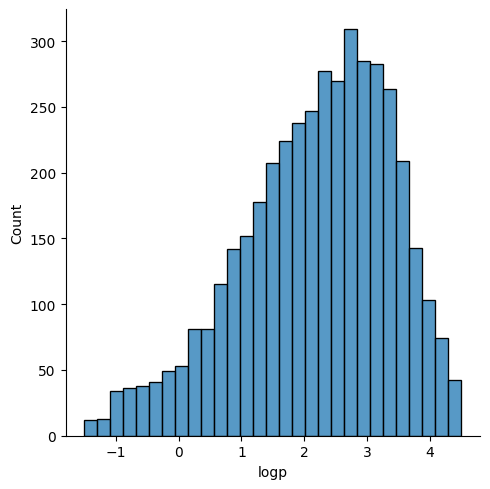

In [52]:
print("mean of logp values :", np.mean(logp))
print("standard deviation of logp values : ",np.std(logp))
sns.displot(logp)

<Axes: ylabel='logp'>

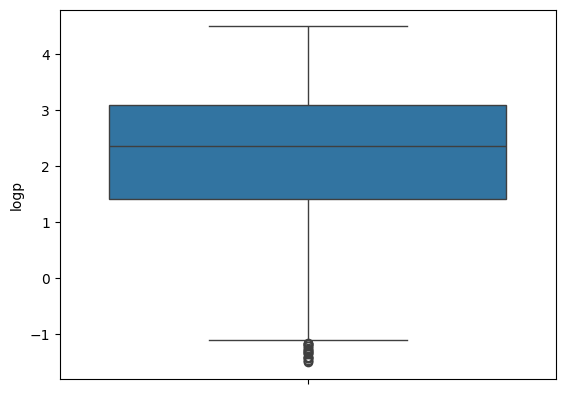

In [117]:
sns.boxplot(logp)

##### 1.2.2 molecule: length distribution.

In [55]:
smiles = liphoplilicity_data["smiles"]

In [58]:
molecule_length = [Chem.MolFromSmiles(smile).GetNumAtoms() for smile in smiles]

mean length of molecule:  27.04
standard deviation of molecule length :  7.461476937928449


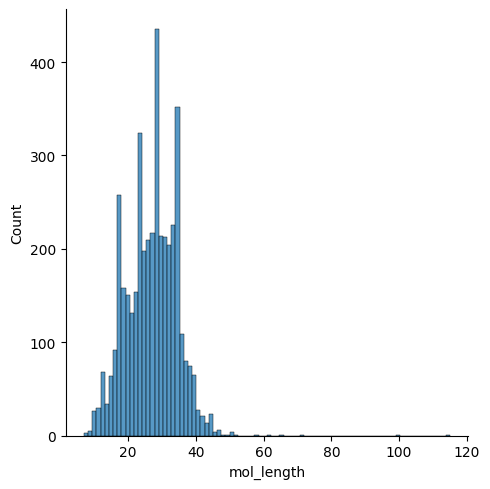

In [65]:
molecule_length_series = pd.Series(molecule_length, name="mol_length")
print("mean length of molecule: ", np.mean(molecule_length_series))
print("standard deviation of molecule length : ", np.std(molecule_length_series))
sns.displot(molecule_length_series)

<Axes: >

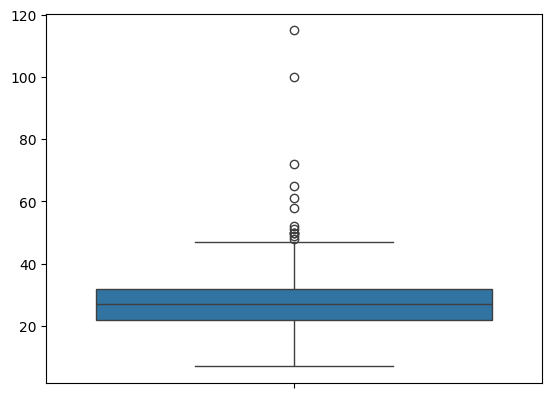

In [116]:
sns.boxplot(molecule_length)

In [69]:
print(molecule_length_series["mol_length"] >= 60)

KeyError: 'mol_length'

In [77]:
len(molecule_length_series[molecule_length_series>=)

4200

[]

<Figure size 1000x1000 with 0 Axes>

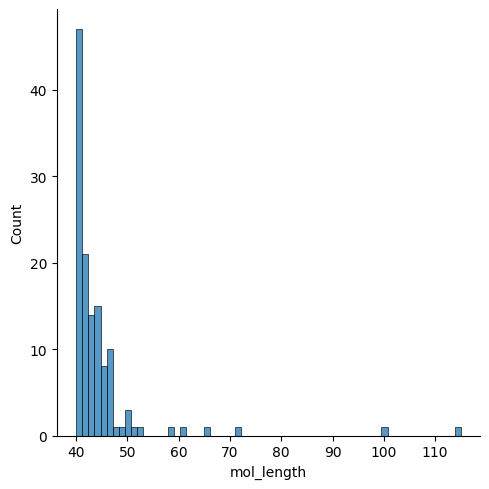

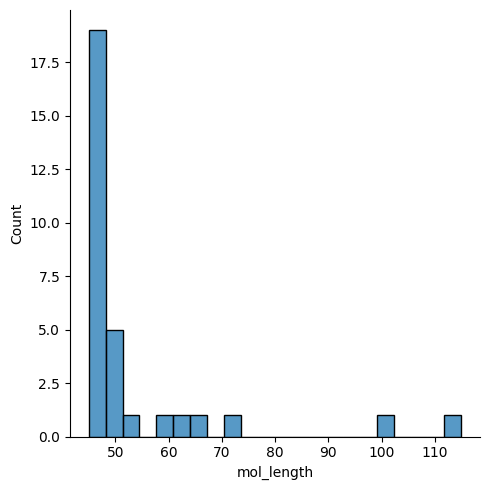

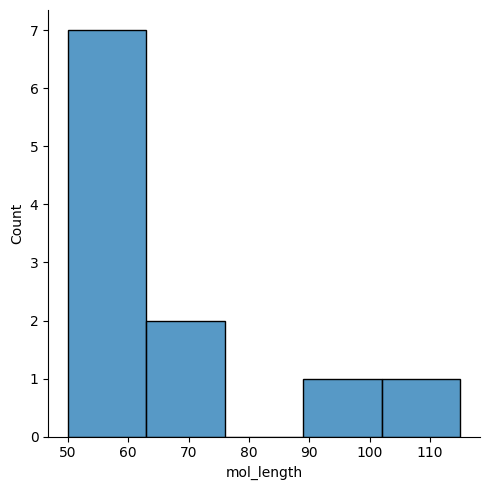

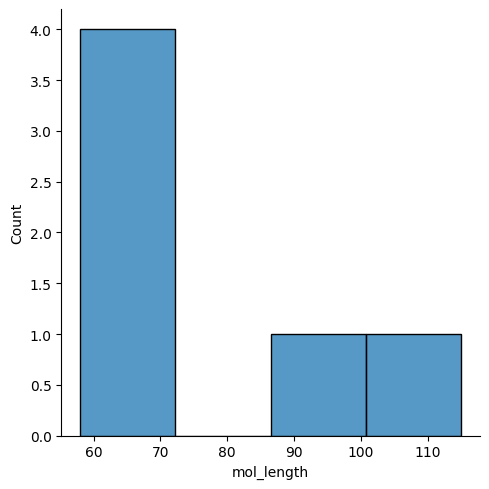

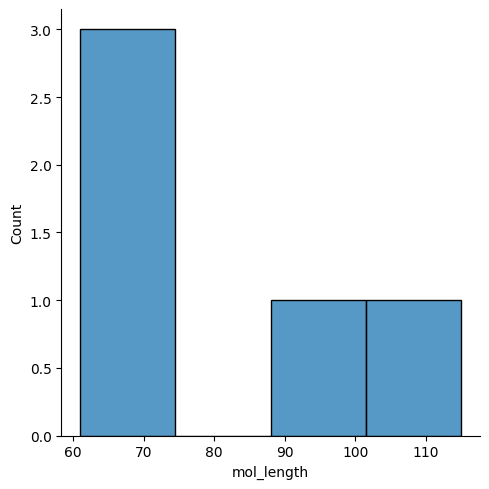

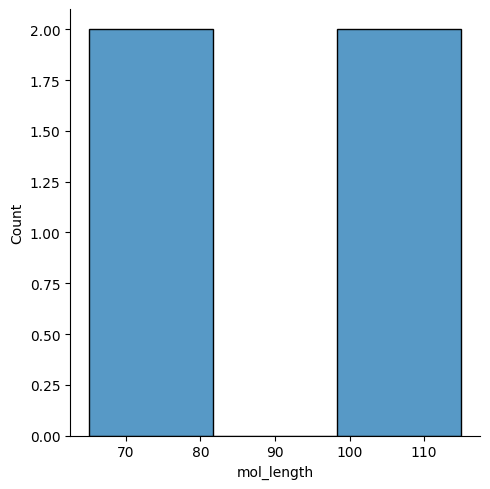

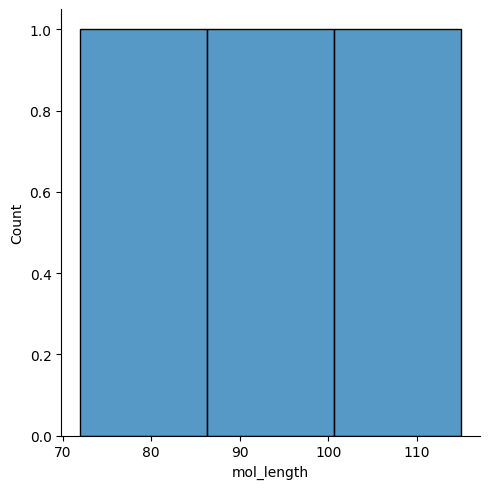

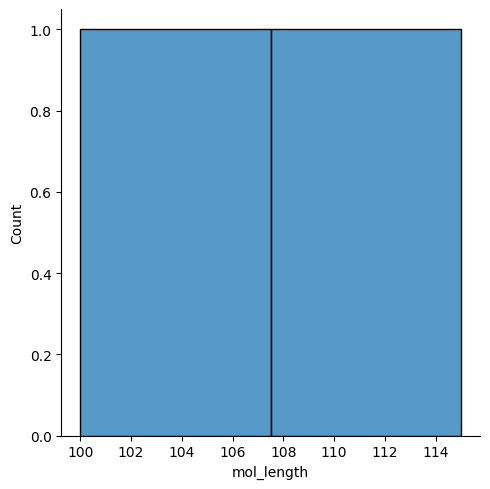

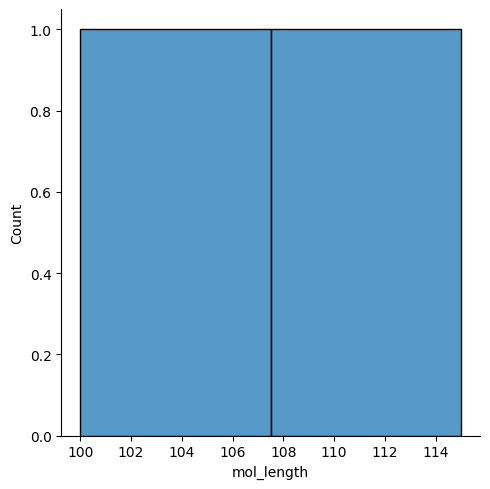

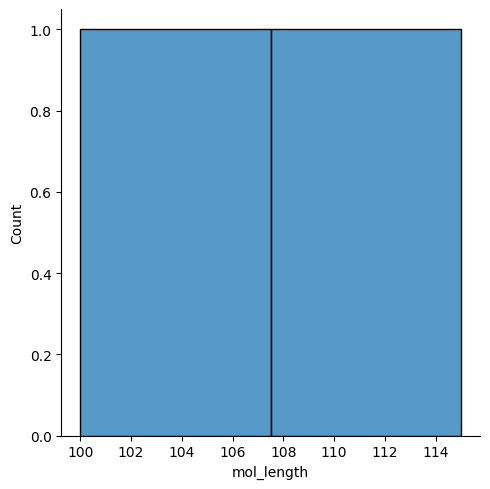

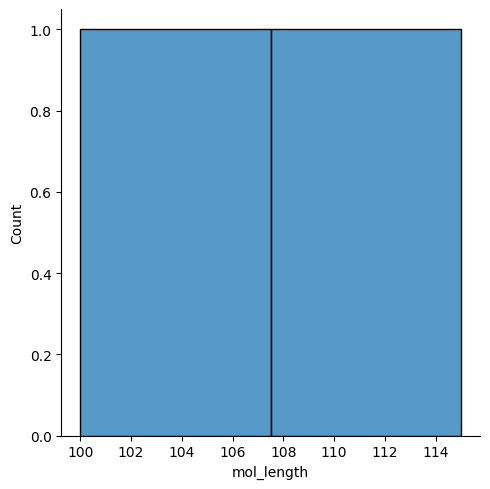

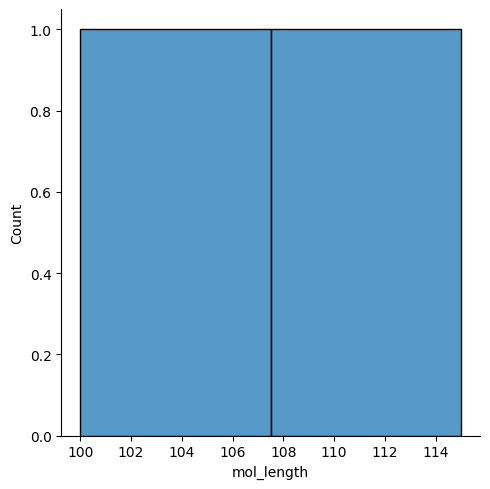

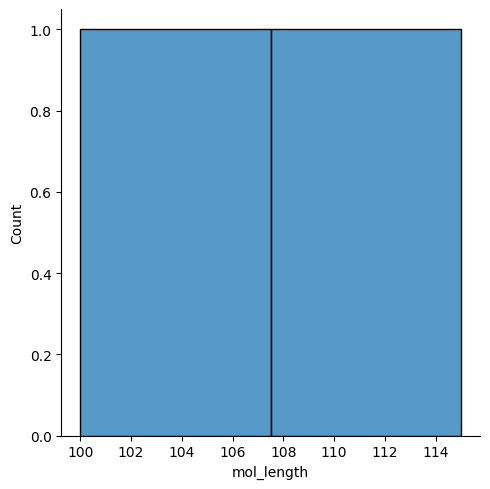

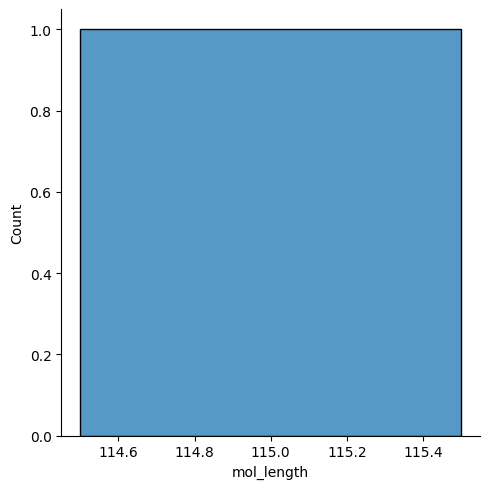

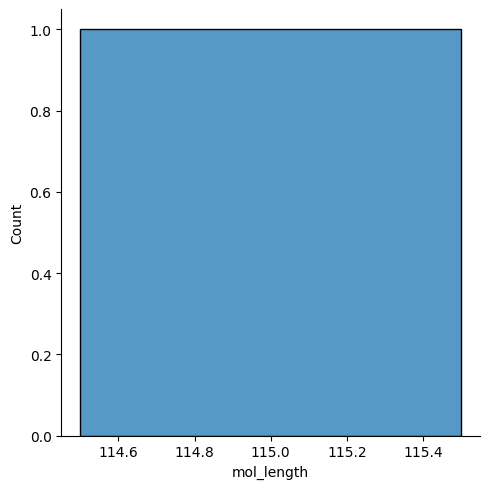

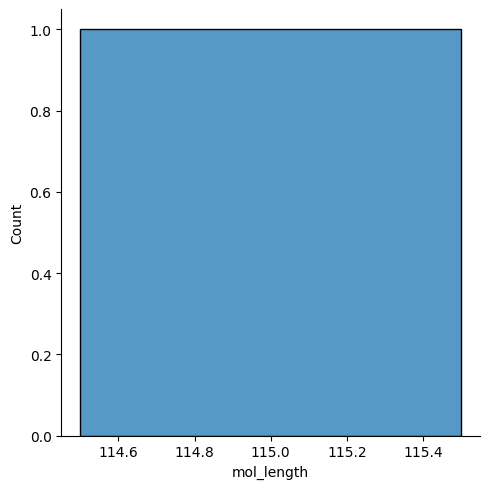

In [96]:
plt.figure(figsize=(10, 10))
fig, axis = plt.subplots(4, 4)
len_plot = len(range(40, 120, 5))
for idx, mol_length in enumerate(range(40, 120, 5)):
    # print(mol_length)
    no_of_molecule = molecule_length_series[molecule_length_series>=mol_length]
    # print(no_of_molecule)
    # plt.subplot(4, 4, idx+1)
    
    sns.displot(no_of_molecule)
plt.plot()

In [108]:
liphoplilicity_data["mol_no"] = molecule_length

In [109]:
liphoplilicity_data.head()

,smiles,logp,mol_no
0,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,3.54,24
1,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,-1.18,33
2,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,3.69,21
3,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,3.37,28
4,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,3.10,28


In [112]:
liphoplilicity_data_filtered = liphoplilicity_data[liphoplilicity_data["mol_no"] <= 60][["smiles", "logp"]]

In [113]:
liphoplilicity_data_filtered

,smiles,logp
0,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,3.54
1,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,-1.18
2,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,3.69
3,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,3.37
4,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,3.10
...,...,...
4195,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1,3.85
4196,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...,3.21
4197,COc1cccc2[nH]ncc12,2.10
4198,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3,2.65
